On the 26th of May, we had the european parliamentary elections. In Romania, the results and progress of the vote were published online in real time on the official electoral site.

As far as I know it's the first time we had such data exposed to the public, and with such granularity.

Since my daily work involves working closely with data, I couldn't miss the oportunity to get my hands on that dataset. [Previously](http://www.clungu.com/Getting-data-of-an-election/) I've shown how I got the data. 

In this second post I'll try to do some quick analisys of it.

# Loading the data

Just to remind ourselves what we're working with.

This is the dataset:

In [510]:
import pandas as pd
import numpy as np
df = pd.read_csv("_data/final.csv")
df.head()

,liste_permanente,lista_suplimentare,total,urna_mobila,county_code,county_name,id_county,id_locality,id_precinct,id_uat,...,Femei 96,Femei 97,Femei 98,Femei 99,Femei 100,Femei 101,Femei 102,Femei 103,Femei 104,Femei 109
0,696,63,759,0,VS,VASLUI,39,9015,16128,2936,...,0,0,0,0,0,0,0,0,0,0
1,140,10,150,0,VS,VASLUI,39,9015,16187,2936,...,0,0,0,0,0,0,0,0,0,0
2,501,25,526,0,VS,VASLUI,39,9006,16086,2933,...,0,0,0,0,0,0,0,0,0,0
3,571,41,612,0,VS,VASLUI,39,9006,16087,2933,...,0,0,0,0,0,0,0,0,0,0
4,680,55,736,1,VS,VASLUI,39,9006,16088,2933,...,0,0,0,0,0,0,0,0,0,0


It has 19k rows (places where voting was held).

In [7]:
df.shape

(19171, 242)

Some descriptive statistics about the dataset.

In [8]:
df.describe(include="all")

,liste_permanente,lista_suplimentare,total,urna_mobila,county_code,county_name,id_county,id_locality,id_precinct,id_uat,...,Femei 96,Femei 97,Femei 98,Femei 99,Femei 100,Femei 101,Femei 102,Femei 103,Femei 104,Femei 109
count,19171.000000,19171.000000,19171.000000,19171.000000,19171,19171,19171.000000,19171.000000,19171.000000,19171.000000,...,19171.000000,19171.000000,19171.000000,19171.000000,19171.000000,19171.000000,19171.000000,19171.000000,19171.000000,19171.000000
unique,NaN,NaN,NaN,NaN,43,43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,B,MUNICIPIUL BUCUREŞTI,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,1269,1269,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,402.484847,81.316468,486.681863,2.880549,NaN,NaN,22.577852,5338.597517,9590.956132,1674.926817,...,0.008137,0.004016,0.001982,0.001565,0.000782,0.000156,0.000365,0.000052,0.000104,0.000052
std,234.090739,162.995607,279.595538,12.756191,NaN,NaN,13.044442,3033.239896,5536.418093,992.618029,...,0.093818,0.064069,0.044478,0.039528,0.027962,0.012509,0.019106,0.007222,0.010214,0.007222
min,0.000000,0.000000,4.000000,0.000000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,204.000000,27.000000,260.000000,0.000000,NaN,NaN,11.000000,2790.500000,4798.500000,807.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,401.000000,44.000000,470.000000,0.000000,NaN,NaN,23.000000,5355.000000,9591.000000,1681.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,582.000000,76.000000,672.000000,0.000000,NaN,NaN,34.000000,8051.000000,14383.500000,2554.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


And all the available columns we have.

In [13]:
list(df.columns)

['liste_permanente',
 'lista_suplimentare',
 'total',
 'urna_mobila',
 'county_code',
 'county_name',
 'id_county',
 'id_locality',
 'id_precinct',
 'id_uat',
 'latitude',
 'locality_name',
 'longitude',
 'medium',
 'precinct_name',
 'precinct_nr',
 'presence',
 'siruta',
 'uat_code',
 'uat_name',
 'men_18_24',
 'men_25_34',
 'men_35_44',
 'men_45_64',
 'men_65+',
 'women_18_24',
 'women_25_34',
 'women_35_44',
 'women_45_64',
 'women_65+',
 'Cod birou electoral',
 'Localitate_x',
 'Secție',
 'Tip',
 'Total alegatori',
 'Total lista permanenta',
 'Total urna mobila',
 'Total prezenti',
 'Prezenti lista permanenta',
 'Prezenti urna mobila',
 'Prezenti lista suplimentara',
 'Total voturi',
 'Voturi nefolosite',
 'Voturi valabile',
 'Voturi anulate',
 'Contestatii',
 'Starea sigiliilor',
 'PSD',
 'USR-PLUS',
 'PRO Romania',
 'UDMR',
 'PNL',
 'ALDE',
 'PRODEMO',
 'PMP',
 'Partidul Socialist Roman',
 'Partidul Social Democrat Independent',
 'Partidul Romania Unita',
 'Uniunea Nationala Pent

# Score validations

The first thing I'd like to see is the percentage of votes that each party has received.

In [47]:
def score(party):
    return df[party].sum() / df['total'].sum()

parties = ["PSD", "USR-PLUS", "PRO Romania", "UDMR", "PNL", "ALDE", "PMP",]
sorted([(party, np.round(score(party)*100, 2)) for party in parties], reverse=True, key=lambda x: x[1])

[('PNL', 26.25),
 ('PSD', 21.87),
 ('USR-PLUS', 21.74),
 ('PRO Romania', 6.26),
 ('PMP', 5.6),
 ('UDMR', 5.11),
 ('ALDE', 4.0)]

Officialy (according to [here](https://www.europafm.ro/bec-anunta-rezultatele-finale-ale-alegerilor-europarlamentare/)) we have the following results.

* PNL 27,0%
* PSD 22,51%
* ALIANȚA 2020 USR-PLUS 22,36%
* PRO ROMÂNIA 6,55%
* PMP 5,66%
* UDMR 5,44%
* ALDE 4,0%
* Others 6,1%

This is a bit at odds with the results that I've got from my computations. I'd like to see exaclty by how much..

## Investigating some discrepancies in the numbers

I'm going to compute the difference between my numbers and the official numbers in two ways:
* absolute improvement, meaning the amount of percentace points that each party has changed with
* relative score increase (i.e. how much did the absolute improvement above meant for the scores that each party got) 

In [32]:
my_results = {party: np.round(score(party)*100, 2) for party in parties}
official_results = {
    "PNL": 27.0,
    "PSD": 22.51,
    "USR-PLUS": 22.36,
    "PRO Romania": 6.55,
    "PMP": 5.66,
    "UDMR": 5.44,
    "ALDE": 4.0,
    "Others": 6.1,
}

sorted([(
    party, 
    f"+{np.round((official_results[party] - my_results[party]) / my_results[party] * 100 , 2)}% relative score increase",
    f"+{np.round((official_results[party] - my_results[party]), 2)}% absolute improvement"
) for party in parties], key=lambda x: x[1], reverse=True)

[('UDMR', '+6.46% relative score increase', '+0.33% absolute improvement'),
 ('PRO Romania',
  '+4.63% relative score increase',
  '+0.29% absolute improvement'),
 ('PSD', '+2.93% relative score increase', '+0.64% absolute improvement'),
 ('PNL', '+2.86% relative score increase', '+0.75% absolute improvement'),
 ('USR-PLUS', '+2.85% relative score increase', '+0.62% absolute improvement'),
 ('PMP', '+1.07% relative score increase', '+0.06% absolute improvement'),
 ('ALDE', '+0.0% relative score increase', '+0.0% absolute improvement')]

In [41]:
score_changes = pd.DataFrame.from_records([{"party":party, 
    "relative score improvement": np.round((official_results[party] - my_results[party]) / my_results[party] * 100 , 2),
    "absolute improvement": np.round((official_results[party] - my_results[party]), 2)
 } for party in parties])

score_changes = score_changes[["party", "absolute improvement", "relative score improvement"]]
score_changes.sort_values(by="relative score improvement", ascending=False)

,party,absolute improvement,relative score improvement
3,UDMR,0.33,6.46
2,PRO Romania,0.29,4.63
0,PSD,0.64,2.93
4,PNL,0.75,2.86
1,USR-PLUS,0.62,2.85
6,PMP,0.06,1.07
5,ALDE,0.00,0.00


So it seems that in the end, the change between the official results and the one I've calculated for (example) UDMR meant a boost of +6.4% of their score ( from 5.11 to 5.44 ). In absolute terms they've only gained 0.33%, but that 0.33% increase meant a 6.4% boost when you consider that they had 5.11% to begin with.

From the data, it seems that virtually all the parties benefited from some form of increase in final scores. I'm unsure to what this is due. The data already counts in a separate row the invalidated votes and I suspect that for each party only the valid votes are counted. So in essence, invalidated vote shouldn't be the cause of these changes. We've also counted the data form the foreign offices.

# Column correlations

In the following sections we will analize the dependence of various columns to others in order and discuss what the results mean (by using correlation scores).

## What is a `correlation`

A [correlation](https://en.wikipedia.org/wiki/Correlation_and_dependence) is a statistical measure that shows how likely are to variables to move in sync. This is usually due to a common underlying factor or in other cases because one of the variables influences the other (causation). 

> Bear in mind that **causation is not the same as correlation**! Sometimes, if two variables are correlated it might be because they have a cause and effect relation, but it's not a given that if we observe correlation we have causation.  For example, read this [seminal paper](http://robertmatthews.org/wp-content/uploads/2016/03/RM-storks-paper.pdf) that shows some great fallacies we might end up with if we consider that correlation means causation. 

So please keep an eye on this statement while reading the sections bellow.

## Types of correlations

Two of the most common type of correlation measures are the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) and [Spearman's rank correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).

Both of them show how likely two variables are correlated, but using a slightly different approach and thus, have a different interpretation of their results:

***Pearson correlation***

    ..evaluates the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other variable.

    For example, you might use a Pearson correlation to evaluate whether increases in temperature at your production facility are associated with decreasing thickness of your chocolate coating.

***Spearman rank-order correlation***

    ..evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

    Spearman correlation is often used to evaluate relationships involving ordinal variables. For example, you might use a Spearman correlation to evaluate whether the order in which employees complete a test exercise is related to the number of months they have been employed.

> `Pearson` measures (for two data series $F_1$ and $F_2$) how well a change of size `a` in the series $F_1$ leads to a change of size `C * a` (proportionaly large) in $F_2$ when `C` is a constant

> `Spearman` measures how common is for two variables to move in the same direction (not by how much)

## Generic correlations between columns

As a first example, we will take all the columns of our dataset and print the pairs with the highest correlation between them. Note that we've excluded from the results the (A, A) pairs that will have a score of 1 (naturally). 

In [50]:
_corr = df[[column for column in df.columns if "Barbati" not in column and "Femei" not in column and "id_" not in column]].corr()
_correlations = _corr.fillna(0).values.flatten()

_pairs = [(_idx // _corr.shape[0], _idx % _corr.shape[0], _correlations[_idx]) for _idx in np.where(_correlations > 0.5)[0]]
_pairs = {(i, j, _corr_val) if i < j else (j, i, _corr_val) for i, j, _corr_val in _pairs if i != j}
_pairs = {(_corr_val, _corr.columns[i], _corr.columns[j]) for i, j, _corr_val in _pairs}
sorted(_pairs, reverse=True)

[(0.9999988405995148, 'Total alegatori', 'Total lista permanenta'),
 (0.9998662230466443, 'Total alegatori', 'Votanti lista'),
 (0.9998609492610934, 'Total lista permanenta', 'Votanti lista'),
 (0.9986963671087307, 'Total prezenti', 'Voturi valabile'),
 (0.998433713220943, 'liste_permanente', 'Prezenti lista permanenta'),
 (0.9981585374630918, 'total', 'Voturi valabile'),
 (0.9978683615024313, 'total', 'Total prezenti'),
 (0.9933939092376602, 'lista_suplimentare', 'Prezenti lista suplimentara'),
 (0.9847303875910568, 'siruta', 'Cod birou electoral'),
 (0.9363222144727064, 'Total voturi', 'Voturi nefolosite'),
 (0.9340859461869343, 'men_25_34', 'women_25_34'),
 (0.9207424840375259, 'women_35_44', 'Voturi valabile'),
 (0.9199551991340589, 'total', 'women_35_44'),
 (0.9189659926817213, 'women_35_44', 'Total prezenti'),
 (0.9163024438767253, 'men_45_64', 'women_45_64'),
 (0.9111562909051516, 'men_35_44', 'women_35_44'),
 (0.9107249415201683, 'liste_permanente', 'Votanti lista'),
 (0.910633

So you can see some obvious correlations at the top, like, `('Total alegatori', 'Total lista permanenta')`. This means that the total number of votes is strongly correlated with the number of people allowed to vote, and this makes sense:
* whenever you have a higher number of people on the voting lists, you will end up with a higher number (in absolute terms) of people who actually voted (spearman). Even more than this, the increase in total voters is proportional with the number of eligible votes (pearson).

The above correlation coefficients were computed using the `pearson` method, which is the `pandas` default setting.

Further down the lists you start to see some interesting results:
```
(0.8888218041604524, 'women_25_34', 'USR-PLUS')
..
(0.7261606942057695, 'men_45_64', 'PNL')
```

These indicate that when we have an increase in each category, we have a **proportional** increase if the other category. In other words, `women_25_34` high attendence resulted in proportionally higher votes for `USR-PLUS`. 

One conclusion you could draw from the above is that, by a large margin (0.88 correlation), `women_25_34` voted for `USR-PLUS`. To a somewhat leasear extent, but by the same reasoning, `men_45_64` voted for `PNL`.

## Correlation matrix

Since a correlation compares two variables at a time, we can compute the scores for all the possible pairs. We end up with a [symetric matrix](https://en.wikipedia.org/wiki/Symmetric_matrix) whose diagonal values are all 1 (the correlation of the pair (column X, column X) is always 1). 

For example, this is the correlation matrix that we get as a result of comparing all the demographic buckets to each other.

In [450]:
df.iloc[:,range(20, 30)].corr().fillna(0)

,men_18_24,men_25_34,men_35_44,men_45_64,men_65+,women_18_24,women_25_34,women_35_44,women_45_64,women_65+
men_18_24,1.000000,0.701936,0.616640,0.561348,0.338181,0.896727,0.687798,0.608060,0.532537,0.352328
men_25_34,0.701936,1.000000,0.872921,0.633216,0.222204,0.643599,0.934086,0.761192,0.571337,0.247303
men_35_44,0.616640,0.872921,1.000000,0.761757,0.362060,0.547091,0.874717,0.911156,0.704520,0.370324
men_45_64,0.561348,0.633216,0.761757,1.000000,0.625348,0.491986,0.658756,0.795008,0.916302,0.571230
men_65+,0.338181,0.222204,0.362060,0.625348,1.000000,0.313547,0.286544,0.478729,0.670303,0.903071
women_18_24,0.896727,0.643599,0.547091,0.491986,0.313547,1.000000,0.666430,0.572266,0.501070,0.343935
women_25_34,0.687798,0.934086,0.874717,0.658756,0.286544,0.666430,1.000000,0.845163,0.658797,0.320458
women_35_44,0.608060,0.761192,0.911156,0.795008,0.478729,0.572266,0.845163,1.000000,0.813859,0.499351
women_45_64,0.532537,0.571337,0.704520,0.916302,0.670303,0.501070,0.658797,0.813859,1.000000,0.646758
women_65+,0.352328,0.247303,0.370324,0.571230,0.903071,0.343935,0.320458,0.499351,0.646758,1.000000


# What each party is correlated with

Now that we know what a correlation is and how to obtain it, we will compute the full (`pearson` in this case) correlation matrix for all columns, and then get the top 10 most correlated columns for each party. The top most correlated column will always be itself (the diagonal value) so we will continue from 1.

In [451]:
_corr = df.corr().fillna(0)
_corr['PSD'].sort_values(ascending=False)[1:10]

men_65+                      0.617477
women_65+                    0.544377
Prezenti lista permanenta    0.523147
liste_permanente             0.517126
men_45_64                    0.502112
Votanti lista                0.485241
Total alegatori              0.485193
Total lista permanenta       0.485173
Voturi anulate               0.474736
Name: PSD, dtype: float64

For `PSD` it seems that the top two are `men_65+` and `women_65+`. 

In [57]:
_corr['PNL'].sort_values(ascending=False)[1:10]

men_45_64          0.726161
Total prezenti     0.722173
Voturi valabile    0.719738
total              0.718390
men_35_44          0.674777
women_35_44        0.649057
Total voturi       0.641204
women_45_64        0.640049
women_25_34        0.606771
Name: PNL, dtype: float64

In [58]:
_corr['Voturi anulate'].sort_values(ascending=False)[1:10]

Votanti lista                0.475865
Total alegatori              0.475692
Total lista permanenta       0.475680
PSD                          0.474736
men_45_64                    0.459099
Prezenti lista permanenta    0.422869
liste_permanente             0.421464
men_65+                      0.394126
total                        0.387026
Name: Voturi anulate, dtype: float64

Of course there is a certain threshold bellowe which, the numbers might mean noise but this number is dataset related. In our case, after working a bit with this dataset, I'd say that 0.5 is a good one for `pearson` and 0.6 for `spearman`. Anything bellow we ignore.  

We will list bellow the top 3 correlated columns, with each individual column using both methods. For some columns it's not worth showind the results because they are meaningless (`id_*` columns, `total`s columns and the like) so we will skip these.

In [506]:
na_columns = df.columns[df.isna().sum() > 0]
non_na_columns = df.columns.difference(na_columns)
non_na_columns

def correlations(corr_matrix, column, irrelevant_score_threshold=0.4):
    """
    Returns the top 3 most correlated columns with the given one, in descending order.
    For columns that have a correlation lower than 0.4 we ignore the results and consider the 
    coefficient score irrelevant.
    """
    _corr = corr_matrix[column][corr_matrix[column] > irrelevant_score_threshold].sort_values(ascending=False)[1:4]
    return [(name, round(score, 2)) for name, score in _corr.items() if "id_" not in name]

def is_column_ignored(column):
    """"We exclude some columns because the output is too verbose"""
    return \
        "id_" in column or \
        "total" in column.lower() or \
        "Barbati" in column or \
        "Femei" in column or \
        column.lower().startswith("list") or \
        column == "siruta"

In [504]:
_corr = df[non_na_columns]._get_numeric_data().corr(method="pearson")
for column in _corr.columns:
    if is_column_ignored(column): continue
    correlated_var = correlations(_corr, column, irrelevant_score_threshold=0.5)
    if correlated_var:
        print(f"{column} -> {correlated_var}")

George-Nicaolae Simion -> [('USR-PLUS', 0.7), ('men_35_44', 0.68), ('Voturi valabile', 0.68)]
Gregoriana-Carmen Tudoran -> [('USR-PLUS', 0.58), ('Voturi valabile', 0.56), ('total', 0.56)]
PMP -> [('Voturi valabile', 0.67), ('total', 0.67), ('Total prezenti', 0.67)]
PNL -> [('men_45_64', 0.73), ('Total prezenti', 0.72), ('Voturi valabile', 0.72)]
PRO Romania -> [('women_45_64', 0.63), ('liste_permanente', 0.61), ('Prezenti lista permanenta', 0.6)]
PSD -> [('men_65+', 0.62), ('women_65+', 0.54), ('Prezenti lista permanenta', 0.52)]
Partidul Romania Unita -> [('Voturi valabile', 0.57), ('Total prezenti', 0.57), ('total', 0.57)]
Prezenti lista permanenta -> [('liste_permanente', 1.0), ('Votanti lista', 0.91), ('Total alegatori', 0.91)]
Prezenti lista suplimentara -> [('lista_suplimentare', 0.99), ('men_25_34', 0.74), ('men_35_44', 0.71)]
Prezenti urna mobila -> [('Total urna mobila', 0.91)]
USR-PLUS -> [('women_25_34', 0.89), ('men_25_34', 0.85), ('Voturi valabile', 0.83)]
Votanti lista ->

We can see that `George-Nicolae Simion`, `Gregoriana-Carmen Tudoran` are correlated with `USR-PLUS`. My view is that these three parties cattered to the same kind of demographics. So whenever we had an increase in these kind of people, all three rose with the same velocity. 

`USR-PLUS` specifically though, is mostly correlated (by far) with `women_25_34` and `men_25_34`. 
Even more, being also highly correlated with `Voturi valabile` means that whenever there were more eligible votes its score rose. Since the increase in votes leads to better scores for `USR+` and increase votes means larger and larger cities, we can deduce that `USR-PLUS` was especially well represented as cities got larger, and the population density increased. 

Other interesting results worth highlighting:
* `PSD -> [('men_65+', 0.62), ('women_65+', 0.54)]`
* `PRO Romania -> [('women_45_64', 0.63)]`
* `PNL -> [('men_45_64', 0.73)`
* `UDMR` isn't present in the above because it seems none of the columns have a high correlation with it.

Interesting how, on the 45-65 age range, women choose to vote `PRO Romania` whereas men, `PNL`.

In [505]:
_corr = df[non_na_columns]._get_numeric_data().corr(method="spearman")
for column in _corr.columns:
    if is_column_ignored(column): continue
    correlated_var = correlations(_corr, column, irrelevant_score_threshold=0.6)
    if correlated_var:
        print(f"{column} -> {correlated_var}")

ALDE -> [('Voturi valabile', 0.65), ('total', 0.65), ('Total prezenti', 0.65)]
George-Nicaolae Simion -> [('USR-PLUS', 0.8), ('Gregoriana-Carmen Tudoran', 0.76), ('PMP', 0.75)]
Gregoriana-Carmen Tudoran -> [('USR-PLUS', 0.78), ('George-Nicaolae Simion', 0.76), ('PMP', 0.74)]
PMP -> [('USR-PLUS', 0.83), ('Voturi valabile', 0.79), ('total', 0.79)]
PNL -> [('men_45_64', 0.74), ('total', 0.74), ('Total prezenti', 0.74)]
PRO Romania -> [('women_45_64', 0.76), ('PMP', 0.75), ('USR-PLUS', 0.75)]
PRODEMO -> [('PRO Romania', 0.6)]
PSD -> [('men_65+', 0.68), ('women_65+', 0.64), ('Prezenti lista permanenta', 0.63)]
Partidul Romania Unita -> [('USR-PLUS', 0.69), ('PMP', 0.66), ('George-Nicaolae Simion', 0.65)]
Peter Costea -> [('USR-PLUS', 0.68), ('women_25_34', 0.63), ('Voturi valabile', 0.63)]
Prezenti lista permanenta -> [('liste_permanente', 1.0), ('Votanti lista', 0.92), ('Total alegatori', 0.92)]
Prezenti lista suplimentara -> [('lista_suplimentare', 0.98), ('men_25_34', 0.63), ('Voturi val

In the `spearman` analisys, we can see there is an even stronger effect of the `same-people-overlap` of the following: [`George-Nicolae Simion`, `Gregoriana-Carmen Tudoran`, `PRO Romania`, `Partidul Romania Unita`, `Peter Costea`, `Uniunea Nationala Pentur Progresul Romaniei`] linked to `USR-PLUS`. So whenever `USR-PLUS` scores increased, these candidate' scores increased as well. We can assume that these being all `niche candidates` they were mostly voted by `progresist`s seeking out alternatives to the older, more established parties.

It's interesting to observe `PRODEMO -> [('PRO Romania', 0.6)]` so an increase in `PRO Romania` means an increase in `PRODEMO`. This might be due to a confusion of naming, both starting with `PRO`, and due to the higher scores obtained by `PRO Romania` and given the fact that it's being led by a former [prime-minister](https://en.wikipedia.org/wiki/Victor_Ponta), I'd say `PRODEMO` were the ones that ganied more votes from this confusion (and not the other way arround).

Again, interesting how, on the 45-65 age range, women choose to vote `PRO Romania` whereas men, `PNL`.
```
PNL -> [('men_45_64', 0.74)]
PRO Romania -> [('women_45_64', 0.76)]
```

# Party corelation with each demographic category

Using all the columns is somewhat distracting because some columns (like the `totals` are obscuring other possible patterns). In this section we're mainly interested to see which demographic category (men and women of various ages) are correlated with each party. We will only do computations on the main parties that got scores above > 4%. 

What we do is compute the correlation between each party and all the granular demographic data that we have, and then show the top 10 correlated columns for each party. 

In [124]:
only_granular_demographic_columns = [column for column in df.columns if "Barbati" in column or "Femei" in column]
_granular_demographics = df[parties+only_granular_demographic_columns].corr(method='pearson').fillna(0)

In [251]:
from IPython.display import display

def correlations(corr_matrix, party):
    _corr = corr_matrix[party].sort_values(ascending=False)[1:10]
    return _corr

for party in parties:
    display(f"{party}", correlations(_granular_demographics, party))

'PSD'

Barbati 69    0.464600
Femei 69      0.452073
Barbati 70    0.449218
Barbati 68    0.439194
Barbati 71    0.437439
Barbati 66    0.429882
Femei 70      0.424870
Barbati 67    0.422452
Barbati 72    0.422372
Name: PSD, dtype: float64

'USR-PLUS'

Femei 31      0.790589
Barbati 34    0.789017
Femei 29      0.787429
Femei 32      0.787392
Femei 33      0.787345
Femei 30      0.786208
Femei 34      0.784999
Barbati 33    0.784203
Barbati 32    0.769324
Name: USR-PLUS, dtype: float64

'PRO Romania'

Femei 51      0.575745
Femei 50      0.519486
Barbati 51    0.496390
Femei 49      0.488390
Femei 63      0.483246
Femei 61      0.481602
Femei 62      0.481364
Femei 60      0.473459
Femei 59      0.469298
Name: PRO Romania, dtype: float64

'UDMR'

Femei 75      0.184590
Femei 77      0.183656
Femei 74      0.172165
Femei 76      0.162428
Barbati 75    0.150304
Barbati 77    0.146041
Barbati 74    0.144867
Barbati 76    0.125835
Femei 67      0.120261
Name: UDMR, dtype: float64

'PNL'

Barbati 44    0.606405
Barbati 46    0.599908
Barbati 45    0.598910
Barbati 43    0.597983
Barbati 48    0.595641
Barbati 47    0.594866
Barbati 49    0.591697
Barbati 42    0.589587
Barbati 50    0.588989
Name: PNL, dtype: float64

'ALDE'

Femei 51      0.337525
Barbati 51    0.333236
Femei 50      0.312419
Femei 49      0.293341
Barbati 50    0.284151
Femei 48      0.282056
Femei 44      0.281466
Femei 63      0.280512
Femei 64      0.280196
Name: ALDE, dtype: float64

'PMP'

USR-PLUS    0.593511
Femei 51    0.566518
Femei 50    0.538230
Femei 34    0.537767
Femei 39    0.536655
Femei 38    0.536526
Femei 35    0.534226
Femei 36    0.532233
Femei 42    0.532082
Name: PMP, dtype: float64

So by age, the 10 most correlated groups for each party indicate the main support demographics (obvious to read and undertand the results). 

## Joint correlation graphs

We can read the above results but is rather hard to make an idea of the whole picture at once. In this section we will put all the numbers above on a single graph (one for males and one for females) s follows:

* each age will represent a bar
* it will be a stacked percentage bar plot, so 
    * the bar will be made out of multiple segments, each representing one party
    * the sum of the dimensinos of the segments will be equals for all ages and so, the segment heights will actually be percentages of 100% (total voted for each age)
    * only the significant result will be included (correlation > 0.4)

For easyer interpretation we will add some dominant colors for each party.

In [220]:
party_colors = {
    "PNL": "xkcd:yellow", 
    "PSD": "r", 
    "USR-PLUS": "xkcd:sky blue", 
    "PMP": "xkcd:yellowgreen",
    "UDMR": "g",
    "ALDE": "xkcd:darkblue",
    "PRO Romania": "xkcd:orange"
}

In [324]:
_males_columns = [column for column in only_granular_demographic_columns if "Barbati" in column]
_female_columns = [column for column in only_granular_demographic_columns if "Femei" in column]

def drop_constant_column(dataframe):
    """
    Drops constant value columns of pandas dataframe.
    """
    return dataframe.loc[:, (dataframe != dataframe.iloc[0]).any()]

def male_female_series(corr_matrix, party, correlation_threshold=0.4):
    _party_demographics = correlations(corr_matrix, party)[only_granular_demographic_columns]
    _party_males = _party_demographics[_males_columns].copy()
    _party_females = _party_demographics[_female_columns].copy()
    _party_males.loc[_party_males < correlation_threshold] = 0
    _party_females.loc[_party_females < correlation_threshold] = 0
    return _party_males, _party_females
    
def process_gender(_males, column_prefix="Barbati "):
    _males = pd.DataFrame({party: _series for party, _series in zip(parties, _males)}).T
    _males = drop_constant_column(_males)
    _males.columns = [int(column.replace(column_prefix, "")) for column in _males.columns]
    return _males

def get_gender_correlations(_granular_demographics, correlation_threshold=0.4):
    _male_females = [male_female_series(_granular_demographics, party, correlation_threshold=correlation_threshold) for party in parties]
    males = list(zip(*_male_females))[0]
    females = list(zip(*_male_females))[1]

    males = process_gender(males, column_prefix="Barbati ")
    females = process_gender(females, column_prefix="Femei ")
    
    return males, females

In [ ]:
from cycler import cycler
import matplotlib.pyplot as plt

def stacked_percentage_bar_plot(_df, title): 
    _df = (_df / _df.sum()).T
    bar_l = range(_df.shape[0])

    cm = plt.get_cmap('nipy_spectral')

    f, ax = plt.subplots(1, figsize=(15,15))
    ax.set_prop_cycle(cycler('color', [party_colors[party] for party in parties]))

    bottom = np.zeros_like(bar_l).astype('float')
    for i, column in enumerate(_df.columns):
        ax.bar(bar_l, _df[column], bottom = bottom, label=column)
        bottom += _df[column].values

    ax.set_xticks(bar_l)
    ax.set_xticklabels(_df.T.columns, rotation=90, size='x-small')
    ax.legend(ncol=2, fontsize='x-small')
    f.subplots_adjust(right=0.75, bottom=0.4)
    ax.set_title(title)
    f.show()

    
def plot_graphs(df, method='pearson', correlation_threshold=0.4):
    _correlation_matrix = df.corr(method=method).fillna(0)
    males, females = get_gender_correlations(_correlation_matrix, correlation_threshold=correlation_threshold)
    stacked_percentage_bar_plot(males, "Males")
    stacked_percentage_bar_plot(females, "Females")

So here we have the results:

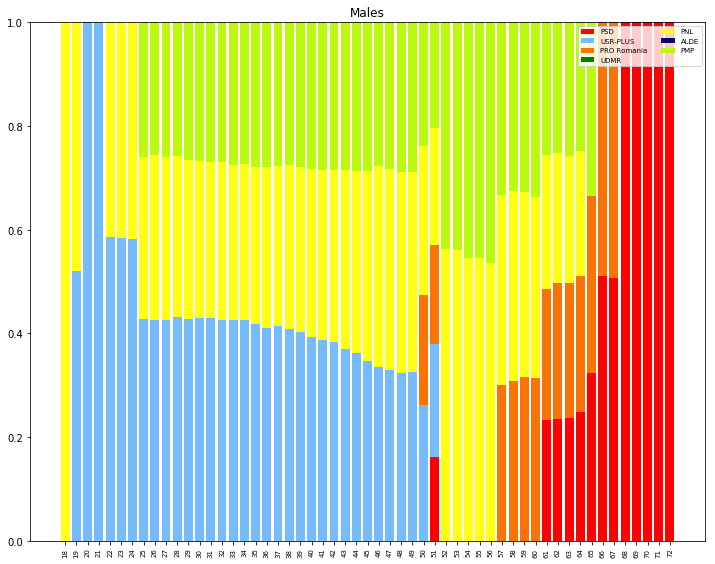

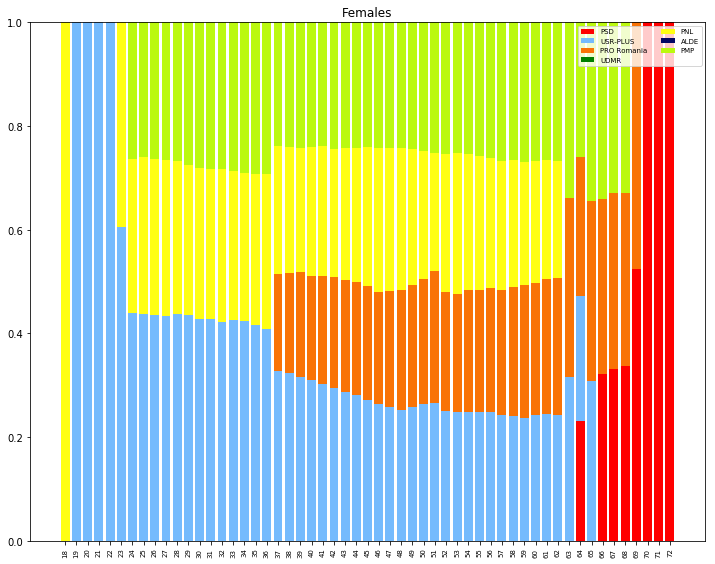

In [249]:
plot_graphs(df[parties+only_granular_demographic_columns], method="pearson", correlation_threshold=0.4)

So, my interpretation:
* `PNL` had a surprising grip on the `18` year olds
* `USR-PLUS` took most of the votes for ages `19-20` in both men and women
* until the age of `36`, the votes were (mostly) split between `USR-PLUS` and `PNL` with `USR-PLUS` starting strong and gradually decreasing. 
* `PRO Romania` was strongly voted by women aged between 37 and 68 (30 year span), and men aged 57-67 (only 10 year span)
* `PSD` was mainly voted by the elderly (60+) in both men and women, but women between 60 and 64 more likely to have voted for `PRO Romania` instead.
* `PMP` had a steady fan-base of people between 25-64 in both women and men (but as percentages show this is makes for aprox. 5% of the electorate).

The above were computed on the `perason` correlation scores. We can do the same with the `spearman` method.

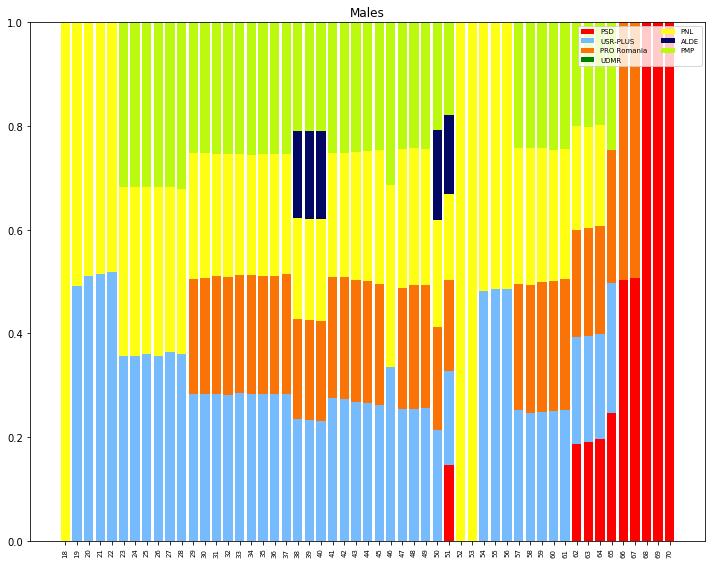

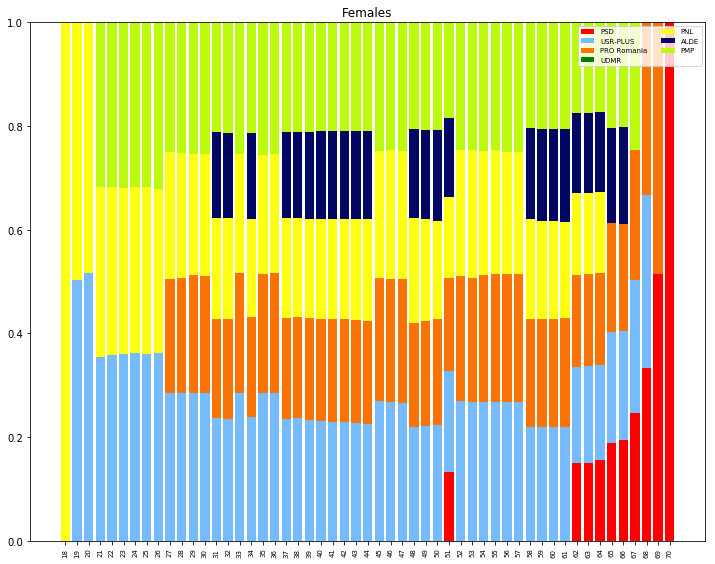

In [250]:
plot_graphs(df[parties+only_granular_demographic_columns], method="spearman", correlation_threshold=0.5)

These graphs show `ALDE` for the first time, and it seems to mostly be liked by women.

In both men and women there's something happening at the age of 51, where all of a sudden we see `PSD`. After this, there is a gap of around 11 years in both men and women until we see again a correlation with `PSD`.

It's possible that this is the exact age of people born during the natality boom Romania had in the 2 years that followed the [Decree 770](https://en.wikipedia.org/wiki/Decree_770). The first year this decree started to have an effect on, was 1967 and the peak lasted to around 2 years. The people born between 1967 and 1970 should have between 50 and 52 years now, and should be almost twice as many as the people aged 54-56.

Depending on when in 1967 each person was born, on 26 may one may have been either 51 or 52 [1967 + (51, 52) = (2018, 2019)]

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d3/BirthDeath_1950_RO.svg/2560px-BirthDeath_1950_RO.svg.png" alt="Drawing" style="width: 600px;"/>

## Correlation with bucketed demographics

Since we also have age buckets already computed (`men_25_34`, etc..) we will also print the correlations of parties relative to these only. The interpretation is easy to make.

In [511]:
from IPython.display import display

def correlations(corr_matrix, party):
    _corr = corr_matrix.T[_bucketed_demographics_columns].T[party].sort_values(ascending=False)[1:]
    return _corr[_corr > 0.5]


_bucketed_demographics_columns = [column for column in df.columns if "men_" in column or "women_" in column]
_bucketed_demographics = df[parties+_bucketed_demographics_columns].corr().fillna(0)
for party in parties:
    display(f"{party}", correlations(_bucketed_demographics, party))
    print("=====================")

'PSD'

women_65+    0.544377
men_45_64    0.502112
Name: PSD, dtype: float64

'USR-PLUS'

men_25_34      0.850179
men_35_44      0.826530
women_35_44    0.819073
men_18_24      0.683041
women_18_24    0.672514
women_45_64    0.647503
men_45_64      0.595842
Name: USR-PLUS, dtype: float64

'PRO Romania'

men_45_64      0.561500
women_35_44    0.522041
Name: PRO Romania, dtype: float64

'UDMR'

Series([], Name: UDMR, dtype: float64)

'PNL'

men_35_44      0.674777
women_35_44    0.649057
women_45_64    0.640049
women_25_34    0.606771
men_25_34      0.606319
men_18_24      0.537984
Name: PNL, dtype: float64

'ALDE'

Series([], Name: ALDE, dtype: float64)

'PMP'

women_35_44    0.632382
men_45_64      0.620332
men_35_44      0.586705
women_25_34    0.573251
men_25_34      0.529779
Name: PMP, dtype: float64

# Interparty correlation

We've explored in some detail the effect of age and gender on the vote results associated with each candidate. 

In this section I'm going to try to plot the correlation that each party had, relative to the other parties. By doing this I'm trying to by how much, each party attracts the same kind of votes. So by inference, by how much each two parties share the same message / catters to the same group of interests.

In order to do this I'll use a dendogram plot, where at each step, the two most similar elements are linked togheter. 

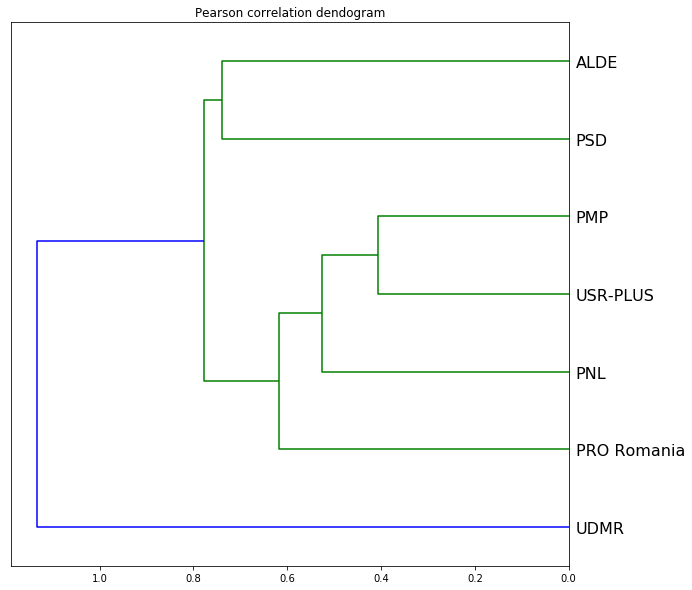

In [260]:
import scipy
from scipy.cluster import hierarchy as hc
from matplotlib import pyplot as plt

def plot_correlation(_df, method='pearson'):
    # compute the correlation matrix
    corr = _df.corr(method=method)
    corr.fillna(value=0, inplace=True)
    
    # compress into a condensed format (only the top triangle of a symetric matrix)
    corr_condensed = hc.distance.squareform(1-corr, checks=False)
    
    # compute the linakages (what is closer to what) 
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=(10,10))
    plt.title(f"{method.title()} correlation dendogram")
    dendrogram = hc.dendrogram(z, labels=corr.columns, orientation='left', leaf_font_size=16)
    plt.show()
    
plot_correlation(df[parties], method='pearson')

In [512]:
_party_correlation = df[parties].corr().fillna(0)

def correlations(corr_matrix, party):
    _corr = corr_matrix[party].sort_values(ascending=False)[1:]
    return _corr
#     return _corr[_corr > 0.5]

for party in parties:
    display(f"{party}", correlations(_party_correlation, party))
    print("=====================")

'PSD'

PRO Romania    0.382307
ALDE           0.261416
PMP            0.218082
PNL            0.206330
USR-PLUS       0.079658
UDMR          -0.223707
Name: PSD, dtype: float64

'USR-PLUS'

PMP            0.593511
PNL            0.501996
PRO Romania    0.418803
ALDE           0.231465
PSD            0.079658
UDMR          -0.042722
Name: USR-PLUS, dtype: float64

'PRO Romania'

PMP         0.462144
USR-PLUS    0.418803
PSD         0.382307
PNL         0.267807
ALDE        0.255237
UDMR       -0.148242
Name: PRO Romania, dtype: float64

'UDMR'

USR-PLUS      -0.042722
ALDE          -0.113350
PMP           -0.130799
PNL           -0.139204
PRO Romania   -0.148242
PSD           -0.223707
Name: UDMR, dtype: float64

'PNL'

USR-PLUS       0.501996
PMP            0.447272
PRO Romania    0.267807
PSD            0.206330
ALDE           0.168811
UDMR          -0.139204
Name: PNL, dtype: float64

'ALDE'

PSD            0.261416
PRO Romania    0.255237
PMP            0.237606
USR-PLUS       0.231465
PNL            0.168811
UDMR          -0.113350
Name: ALDE, dtype: float64

'PMP'

USR-PLUS       0.593511
PRO Romania    0.462144
PNL            0.447272
ALDE           0.237606
PSD            0.218082
UDMR          -0.130799
Name: PMP, dtype: float64

* Close to 0 scores mean that the two parties have orthogonal behaviour (when one's score is increasing it doesn't influence the score of the other - this means that they address wildly different people cathegories and interests).
* Minus scores mean that if the score of one party is increasing, the score of the other is decreasing. The only such case is UDMR, that is inversely correlated with all the other parties. This means that whenever UDMR has a high score, the scores of the others go in the oposite way, and whenever the others start to gain traction, UDMR is loosing scores. 

# Urban vs Rural attendence

The data that we have also contains the `medium` information, telling us if votes were cast in rural areas versus urban ones. Since we have this, I'd like to see the how men and women behaved in each setting.

In order to do this we first have to do some data manipulation, adding the gender column, and reparating the data for each one. 

In [317]:
non_demographic_columns = set(df.columns) - \
    {column for column in df.columns if column.startswith("men_")} - \
    {column for column in df.columns if column.startswith("women_")} - \
    set(_males_columns) - \
    set(_female_columns)

In [334]:
_male_columns = df[_males_columns + ["precinct_nr"]]
_male_columns.columns = [int(column.replace("Barbati ", "")) for column in _males_columns] + ["precinct_nr"]
_male_columns["gender"] = "males"

_fem_columns = df[_female_columns + ["precinct_nr"]]
_fem_columns.columns = [int(column.replace("Femei ", "")) for column in _female_columns] + ["precinct_nr"]
_fem_columns["gender"] = "females"


df_by_gender = pd.concat((
    pd.merge(df[non_demographic_columns].copy(), _male_columns, on="precinct_nr"),
    pd.merge(df[non_demographic_columns].copy(), _fem_columns, on="precinct_nr")
))

/home/tecknoworks/~Envs/deep3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/tecknoworks/~Envs/deep3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/tecknoworks/~Envs/deep3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will chang

And here are the results. You can read their interpretation from the titles.

In [414]:
age_columns = list(range(18, 90))

_df = df_by_gender[["gender", "medium"] + age_columns].fillna(0)

urban_males_votes = np.sum(_df[(_df.medium == "U") & (_df.gender == "males")][age_columns].values)
urban_females_votes = np.sum(_df[(_df.medium == "U") & (_df.gender == "females")][age_columns].values)

rural_males_votes = np.sum(_df[(_df.medium == "R") & (_df.gender == "males")][age_columns].values)
rural_females_votes = np.sum(_df[(_df.medium == "R") & (_df.gender == "females")][age_columns].values)

# scale the numbers according to their total magnitude. Urban dwellers are more numerous
_pivot = _df.pivot_table(index=["medium", "gender"], aggfunc=lambda x: x.sum())

_pivot.loc[("U", "males"), age_columns] /= urban_males_votes
_pivot.loc[("U", "females"), age_columns] /= urban_females_votes
_pivot.loc[("R", "males"), age_columns] /= rural_males_votes
_pivot.loc[("R", "females"), age_columns] /= rural_females_votes

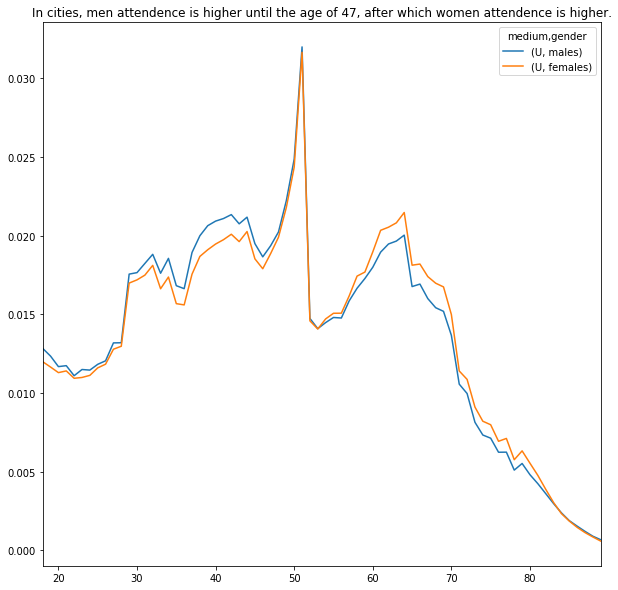

In [429]:
_pivot.loc[[("U", "males"), ("U", "females")], :].T.plot(figsize=(10,10), title="In cities, men attendence is higher until the age of 47, after which women attendence is higher.")

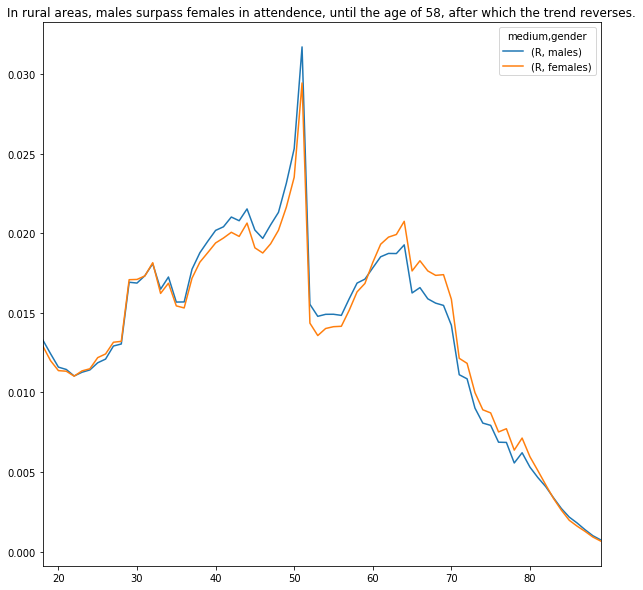

In [427]:
_pivot.loc[[("R", "males"), ("R", "females")], :].T.plot(figsize=(10,10), title="In rural areas, males surpass females in attendence, until the age of 58, after which the trend reverses.")

# Other interesting findings

Columns highly correlated with "Urna mobila" (mobile voting booth)

In [281]:
df[[column for column in df.columns if "Femei " not in column and "Barbati " not in column]].corrwith(df.urna_mobila).sort_values(ascending=False)[1:20]

PSD                          0.233645
women_65+                    0.197278
men_65+                      0.190935
Voturi anulate               0.148569
men_45_64                    0.124989
Total prezenti               0.115288
total                        0.112613
Voturi valabile              0.111136
presence                     0.106723
men_18_24                    0.098921
UDMR                         0.098836
Prezenti lista permanenta    0.093936
women_45_64                  0.087840
liste_permanente             0.082491
Total alegatori              0.073915
Total lista permanenta       0.073891
Votanti lista                0.073797
men_35_44                    0.073775
men_25_34                    0.070998
dtype: float64

Columns highly correlated with "Liste suplimentare" (mobile voting booth)

In [282]:
df[[column for column in df.columns if "Femei " not in column and "Barbati " not in column]].corrwith(df.lista_suplimentare).sort_values(ascending=False)[1:20]

Prezenti lista suplimentara    0.993394
men_25_34                      0.739754
men_35_44                      0.712754
women_25_34                    0.647773
George-Nicaolae Simion         0.630228
USR-PLUS                       0.628024
Total voturi                   0.580983
Voturi valabile                0.555929
Total prezenti                 0.551418
total                          0.540754
women_35_44                    0.522387
PNL                            0.509740
Voturi nefolosite              0.498012
men_18_24                      0.492730
women_18_24                    0.443678
men_45_64                      0.442544
PMP                            0.431459
Partidul Romania Unita         0.346605
Peter Costea                   0.329325
dtype: float64

Columns highly correlated with "Voturi anulate" (mobile voting booth)

In [287]:
df[[column for column in df.columns if "Femei " not in column and "Barbati " not in column]].corrwith(df["Voturi anulate"]).sort_values(ascending=False)[1:20]

Votanti lista                0.475865
Total alegatori              0.475692
Total lista permanenta       0.475680
PSD                          0.474736
men_45_64                    0.459099
Prezenti lista permanenta    0.422869
liste_permanente             0.421464
men_65+                      0.394126
total                        0.387026
Total prezenti               0.386483
Total voturi                 0.380412
women_45_64                  0.375835
Voturi valabile              0.356550
PNL                          0.342141
women_65+                    0.323280
Partidul Socialist Roman     0.320872
Voturi nefolosite            0.313705
women_35_44                  0.312228
men_18_24                    0.281524
dtype: float64